# Multi-modal vectors

These vectors are from a multi-modal embedding model that can represent either text or images in a 1024-dimensional space.


In [13]:
import json

with open('vectors_multimodal_images.json') as f:
    image_vectors = json.load(f)

with open('vectors_multimodal_words.json') as f:
    word_vectors = json.load(f)
    

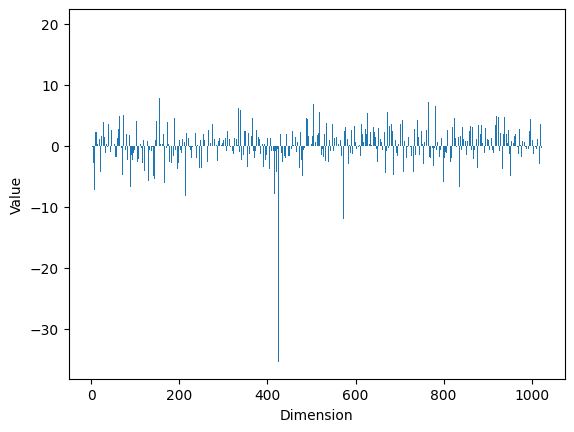

In [14]:
import random

import matplotlib.pyplot as plt

random_image_name = random.choice(list(image_vectors.keys()))
vector = image_vectors[random_image_name]

plt.bar(range(len(vector)), vector)
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.show()

In [15]:
# Is it a unit vector?
import numpy as np

np.linalg.norm(vector)

92.16014870205625

In [16]:
import pandas as pd

def cosine_similarity(v1, v2):
    """Compute the cosine similarity between two vectors"""
    dot_product = sum([a * b for a, b in zip(v1, v2)])
    magnitude = (sum([a**2 for a in v1]) * sum([a**2 for a in v2])) ** 0.5
    return dot_product / magnitude

def most_similar(target_vector: str, vectors: dict) -> list[list]:
    """Return the 10 most similar images and similarities to the given images"""
    similarities = {w: cosine_similarity(target_vector, vector) for w, vector in vectors.items()}
    most_similar = sorted(similarities, key=similarities.get, reverse=True)
    return pd.DataFrame([(vector_key, similarities[vector_key]) for vector_key in most_similar], columns=['vector key', 'similarity'])

most_similar(image_vectors["inhaleexhale_top.jpg"], image_vectors)

vector key  similarity
0              inhaleexhale_top.jpg    1.000000
1                 breathe_front.jpg    0.675889
2           incenseholder5_side.jpg    0.594426
3              glasscandle_side.jpg    0.576444
4           incenseholder4_side.jpg    0.573394
5     doubletealight1_aboveside.jpg    0.565687
6              glasscandle2_top.jpg    0.560658
7              hakunamatata_top.jpg    0.555541
8          singletealight1_side.jpg    0.553126
9          tripletealight_above.jpg    0.548659
10             amulet9_fullshot.jpg    0.529791
11          matatamagnet_fridge.jpg    0.529220
12             amulet4_fullshot.jpg    0.528353
13            amulet10_fullshot.jpg    0.524103
14      chainnecklace3_top_back.jpg    0.520506
15             amulet8_fullshot.jpg    0.507792
16           chainnecklace3_top.jpg    0.502703
17           tealightsand_night.jpg    0.501923
18             amulet7_fullshot.jpg    0.494060
19    doubletealight2_aboveside.jpg    0.485883
20             amulet3_fullshot.jpg    0.482302
21           driftwoodearrings1.jpg    0.481384
22             goldtri_fullshot.jpg    0.476598
23             amulet6_fullshot.jpg    0.468085
24     driftwoodearrings3_front.jpg    0.467464
25          goldnugget_fullshot.jpg    0.466961
26  driftwoodearrings2_fullshot.jpg    0.465163
27             amulet2_fullshot.jpg    0.464560
28             amulet5_fullshot.jpg    0.463278
29      driftwoodearrings3_back.jpg    0.458224
30     stripednecklace_fullshot.jpg    0.442124
31             amulet1_fullshot.jpg    0.441525
32           chainnecklace1_top.jpg    0.425117
33           chainnecklace2_top.jpg    0.414595
34          shellchain_fullshot.jpg    0.375104
35           stonechain_closeup.jpg    0.362456
36    compassionprayer_straight.png    0.301283

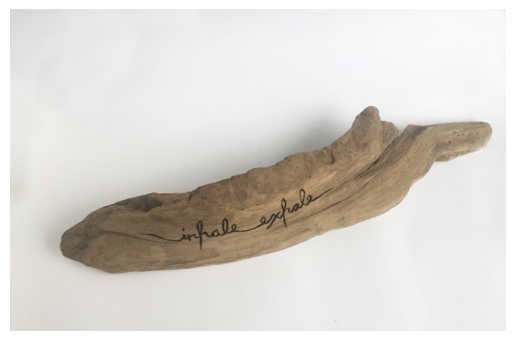

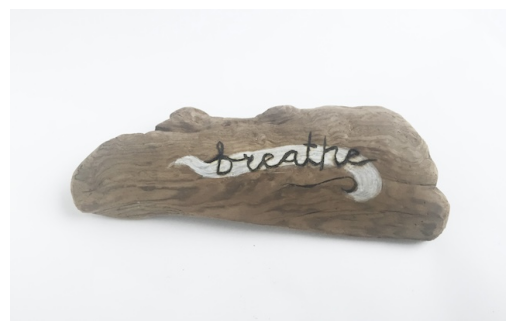

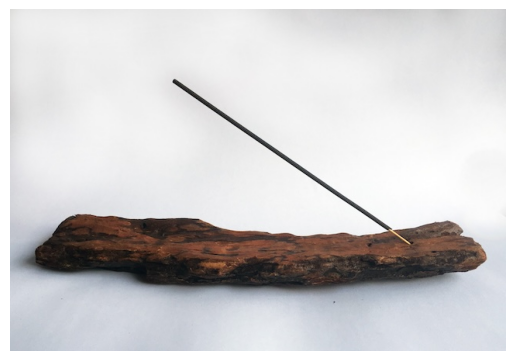

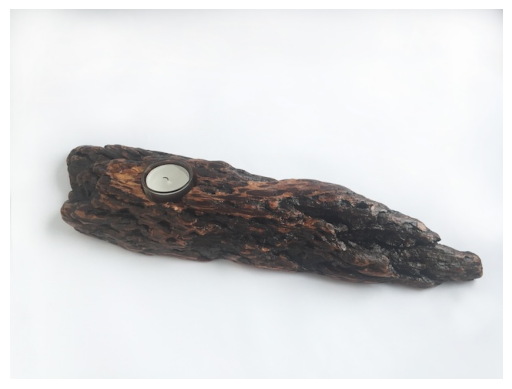

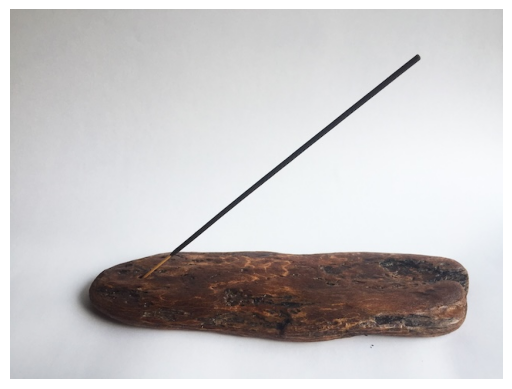

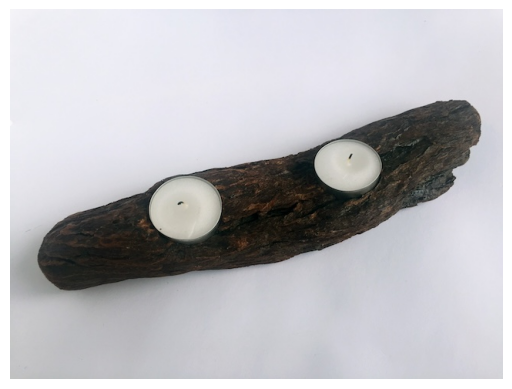

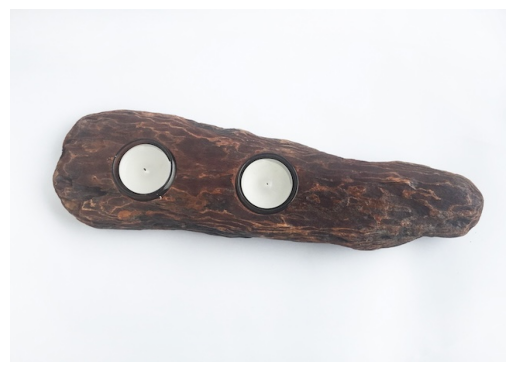

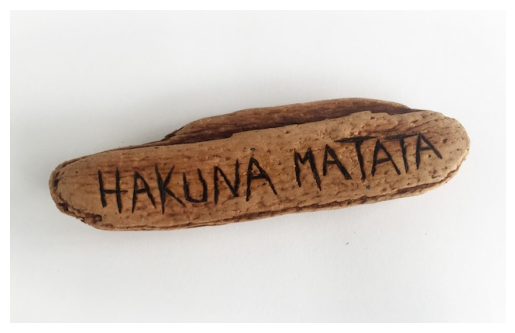

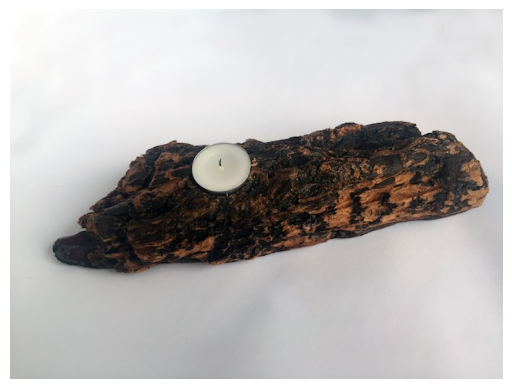

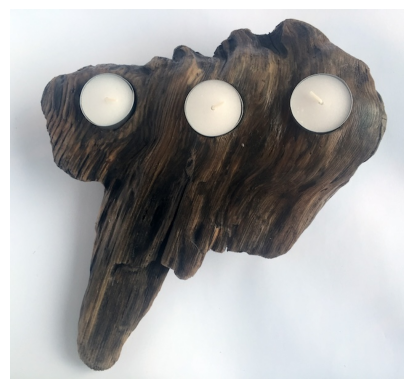

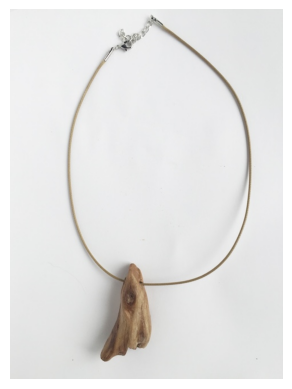

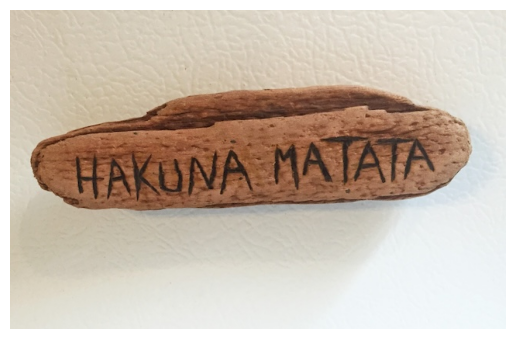

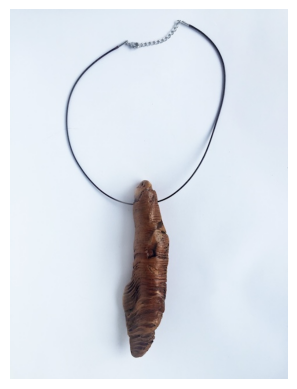

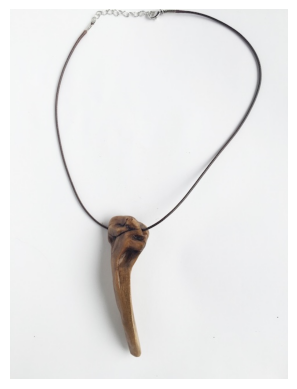

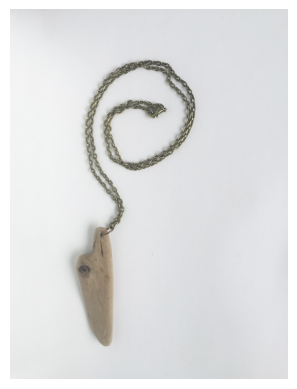

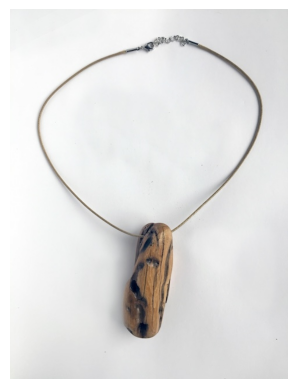

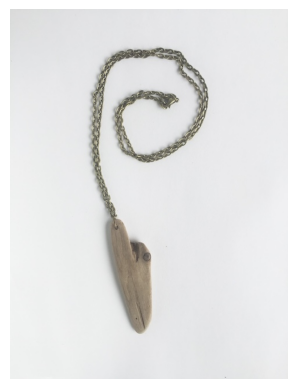

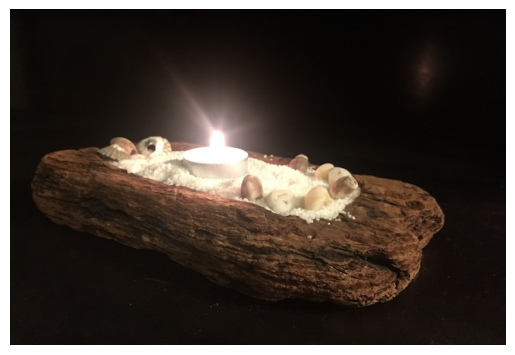

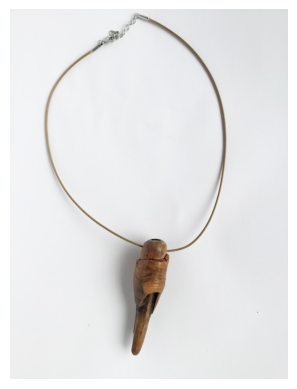

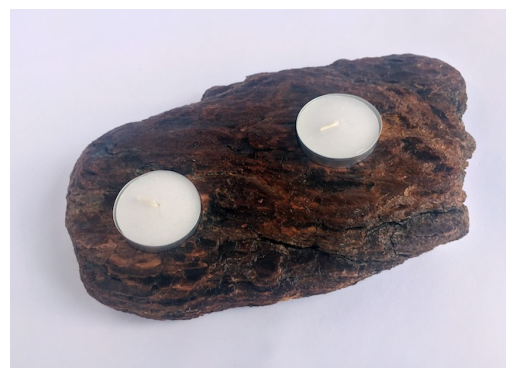

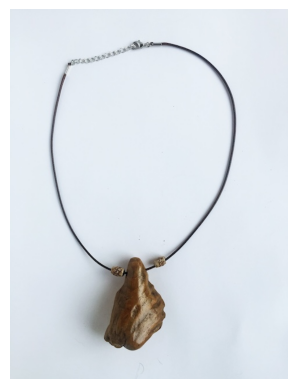

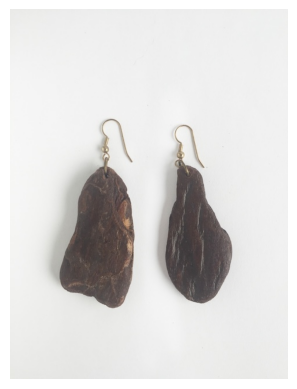

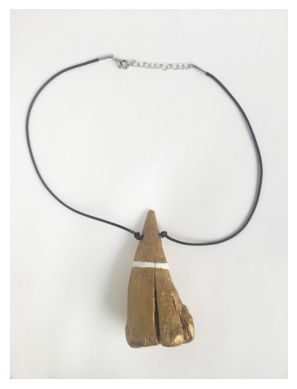

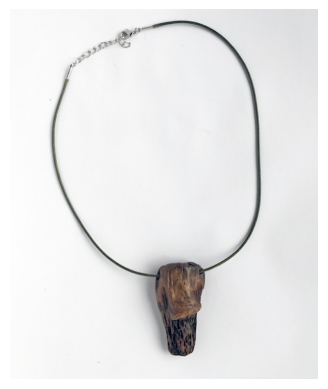

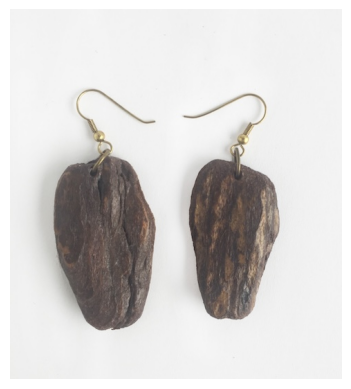

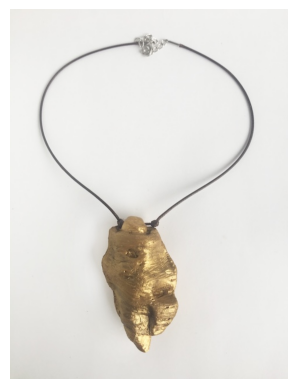

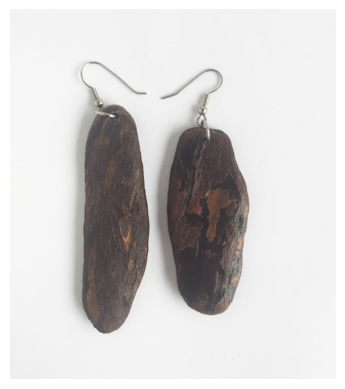

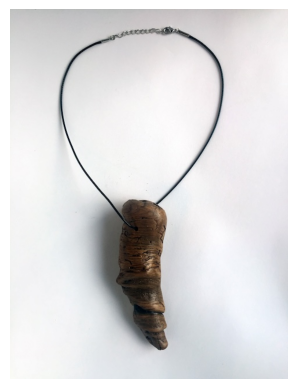

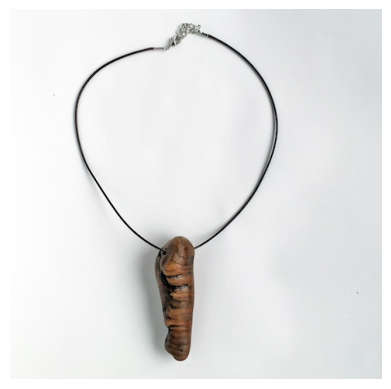

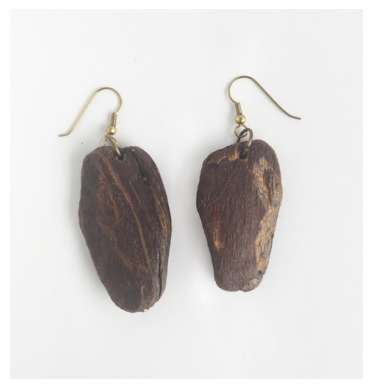

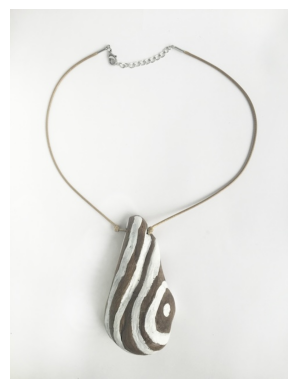

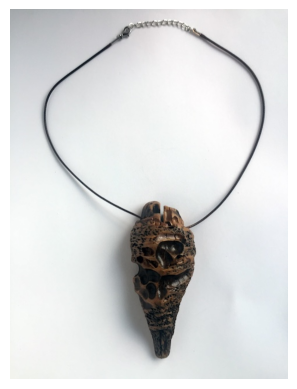

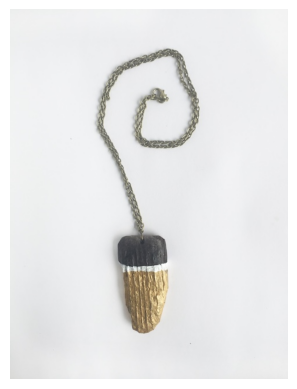

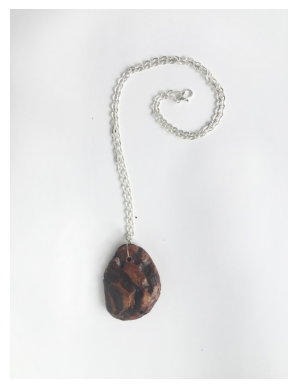

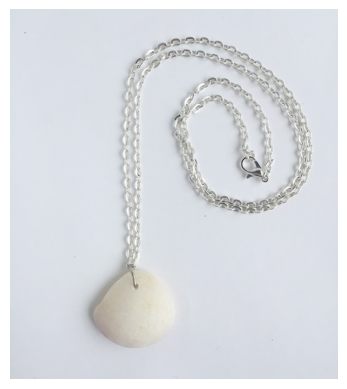

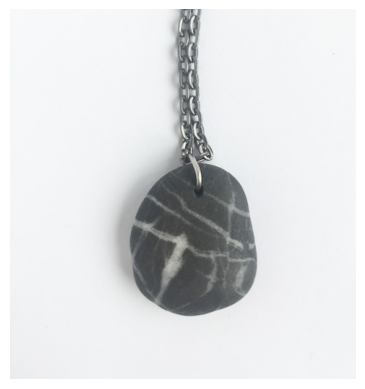

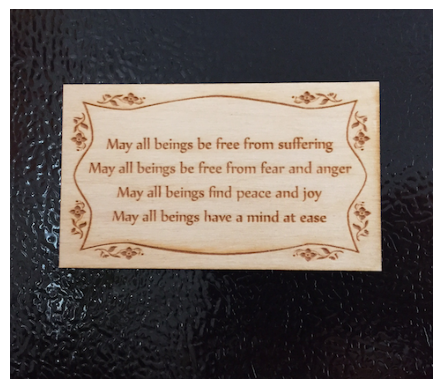

In [17]:
# Now render each of those images
most_similar_df = most_similar(image_vectors["inhaleexhale_top.jpg"], image_vectors)

# loop through image_name column
for image_name in most_similar_df['vector key']:
    plt.imshow(plt.imread(f'product_images/{image_name}'))
    plt.axis('off')
    plt.show()

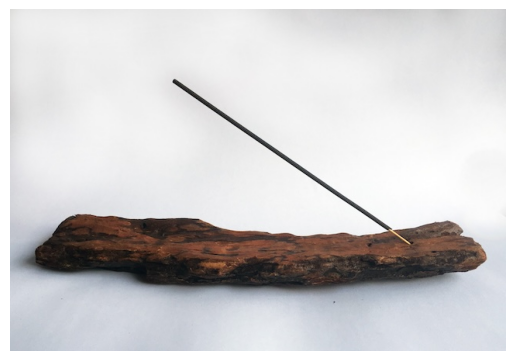

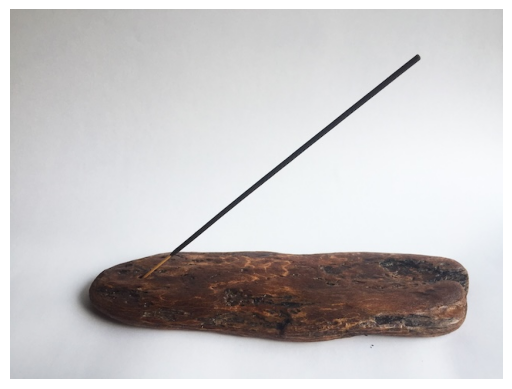

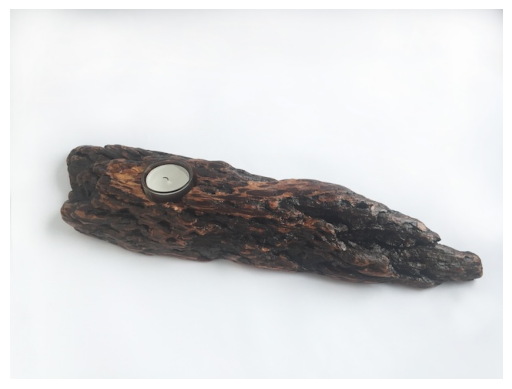

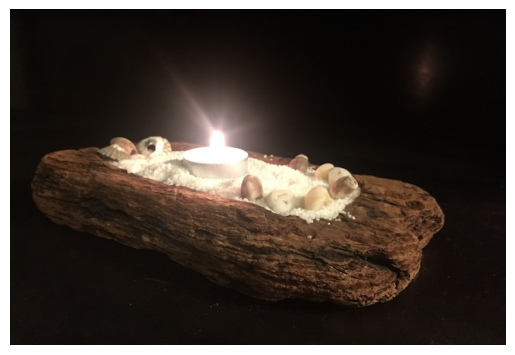

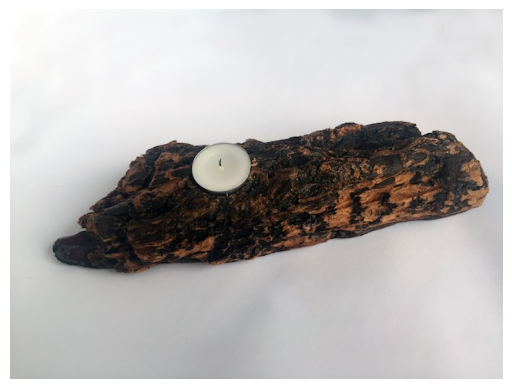

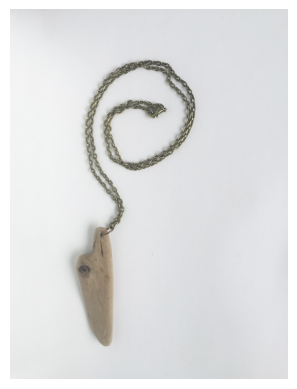

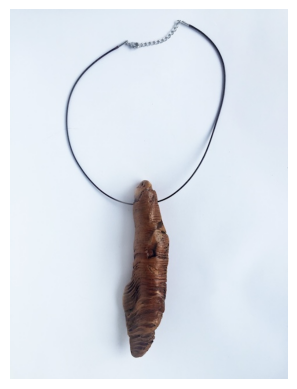

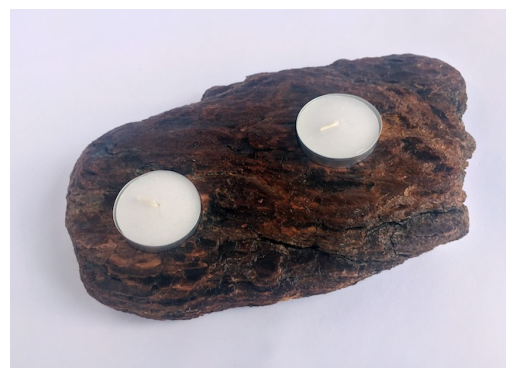

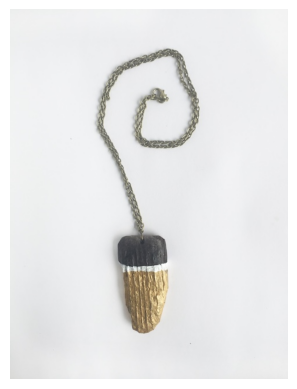

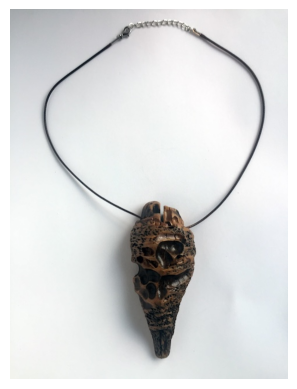

In [19]:
# Now look for most similar to a word
most_similar_df = most_similar(word_vectors["time"], image_vectors)

for image_name in most_similar_df['vector key'][0:10]:
    plt.imshow(plt.imread(f'product_images/{image_name}'))
    plt.axis('off')
    plt.show()

In [20]:
import os

import requests
import dotenv
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

dotenv.load_dotenv()

azure_credential = DefaultAzureCredential(exclude_shared_token_cache_credential=True)

token_provider = get_bearer_token_provider(azure_credential, "https://cognitiveservices.azure.com/.default")
AZURE_COMPUTERVISION_SERVICE = os.getenv("AZURE_COMPUTERVISION_SERVICE")
AZURE_COMPUTER_VISION_URL = f"https://{AZURE_COMPUTERVISION_SERVICE}.cognitiveservices.azure.com/computervision/retrieval"

def get_model_params():
    return {"api-version": "2023-02-01-preview", "modelVersion": "latest"}

def get_auth_headers():
    return {"Authorization": "Bearer " + token_provider()}

def get_text_embedding(text):
    url = f"{AZURE_COMPUTER_VISION_URL}:vectorizeText"
    return requests.post(url, headers=get_auth_headers(), params=get_model_params(),
                         json={"text": text}).json()["vector"]

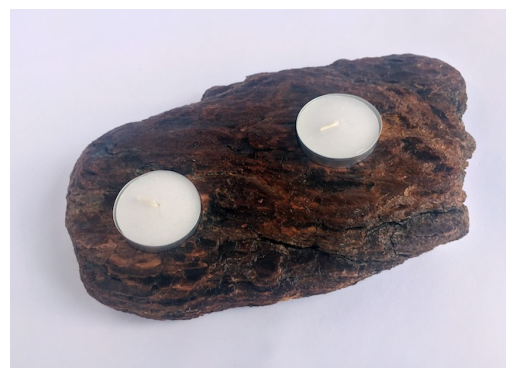

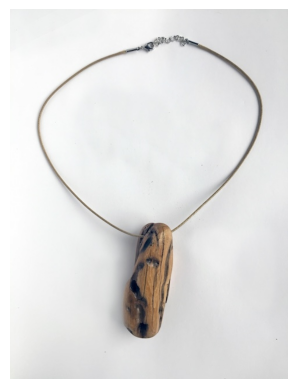

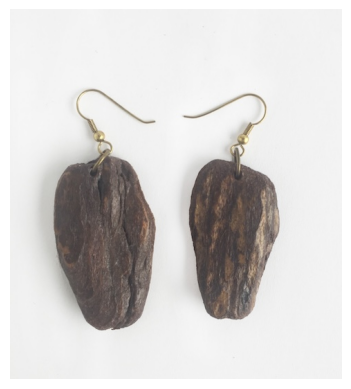

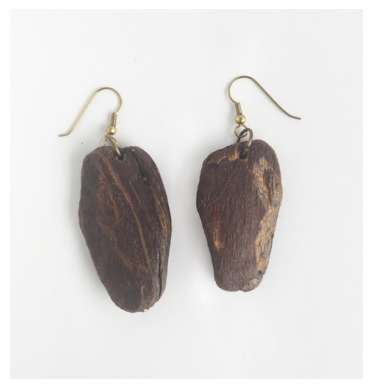

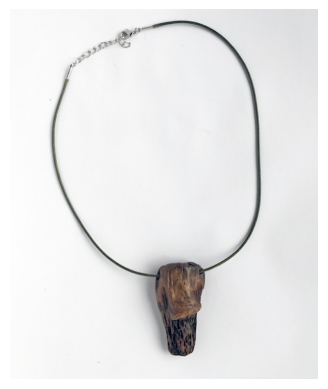

In [28]:
# Now look for most similar to a word
embedding = get_text_embedding("drums")
most_similar_df = most_similar(embedding, image_vectors)

for image_name in most_similar_df['vector key'][0:5]:
    plt.imshow(plt.imread(f'product_images/{image_name}'))
    plt.axis('off')
    plt.show()

## Resources

* [Portlandia - She's making jewelry now](https://www.youtube.com/watch?v=Kg6H0Cd1_Jc)